## Understanding Entropy
### We will discuss 
+ __How to generate a message__ randomly with letters. 
+ __How to count the occurrence__ of each letter and calculate its probability. 


### <font color=purple> Text message </font>
### &#9632; How to generate random English alphabets

In [3]:
import string
import random

def GetString():
    outString = string.ascii_uppercase
    return outString

def GenMsg(msgLen):
    keylist = [random.choice(GetString()) for i in range(msgLen)]
    return (''.join(keylist))

# Python script
msgLength = 20

lst = [i for i in range(10)]
print(string.ascii_uppercase) # This will print letters from A to Z
print(random.choice(lst))     # This will choose a value of input data randomly

GenMsg(msgLength)

ABCDEFGHIJKLMNOPQRSTUVWXYZ


'ZXQZNRBYENXSLIGFFSQJ'

The above codes generates letters randomly, however, we need to fix its state to generate random but the same letters sometimes.

#### How to fix the state of random number generator
We will use `random.Random()` for this purpose. 
`random.Random()` behaves like a random generator with a seed.

In ASCII code, alphabet A to Z is from 65 to 90 and a to z is from 97 to 122.

Reference: ASCII Chart <br>
https://python-reference.readthedocs.io/en/latest/docs/str/ASCII.html

In [5]:
import random

def GenMsg(msgLen, lastLetter):
    # Make sure that # of alphabets can't be larger than 26.
    lastLetter = (lastLetter>25)*25+(lastLetter<=25)*lastLetter
    
    outString = ''
    for i in range(msgLen):
        tmpString = chr(random.Random(i).randrange(65, 65 + lastLetter + 1))
        # This code is equivalent to the above line
        #tmpString = chr(random.Random(i).randrange(97, 97 + lastLetter + 1)).upper()

        outString += tmpString
    return outString

# Python script
msgLength = 40
lastChr = 25     # min: 0, max:25 (# of alphabets)

GenMsg(msgLength, lastChr)

'MEBHHTZKHOSOPIDGLQFVXFEYWMXUDRRACSQRKVUG'

#### Tips: ordinal numbers to characters and vice versa

In [5]:
a = [65, 66, 67, 68]
b = list(chr(num) for num in a)
c = list(ord(character) for character in b)

print(a)
print(b)
print(c)

[65, 66, 67, 68]
['A', 'B', 'C', 'D']
[65, 66, 67, 68]


### &#9632; Counting the occurrence of each letter: 
#### Method 1: using string method `count()` and dictionary datatype

In [17]:
import random

def GenMsg(msgLen, lastLetter):
    lastLetter = (lastLetter>26)*26+(lastLetter<=26)*lastLetter
    outString = ''
    for i in range(msgLen):
        tmpString = chr(random.Random(i).randrange(65, 65 + lastLetter + 1))
        outString += tmpString
    return outString

# Python script
msgLength = 40
lastChr = 3     # min: 0, max:25 (# alphabets)
outMsg = GenMsg(msgLength, lastChr)
print(outMsg, type(outMsg))

# Counting letters
msgDict = dict((i, outMsg.count(i)) for i in outMsg)
print(msgDict)
print(msgDict['A'])
print('A' in msgDict)

DBABBCACBDADDCABCDBABBBCDDBDAACAABCCCADB <class 'str'>
{'D': 9, 'B': 12, 'A': 10, 'C': 9}
10
True


#### Method 2: using `Counter()` in collections module

In [26]:
import random
from collections import Counter

def GenMsg(msgLen, lastLetter):
    lastLetter = (lastLetter>26)*26+(lastLetter<=26)*lastLetter
    outString = ''
    for i in range(msgLen):
        tmpString = chr(random.Random(i).randrange(65, 65 + lastLetter + 1))
        outString += tmpString
    return outString

# Python script
msgLength = 40
lastChr = 3     # min: 0, max:25 (# alphabets)
outMsg = GenMsg(msgLength, lastChr)
print(outMsg, type(outMsg))

# Counting letters
msgDict1 = dict(Counter(outMsg))
print(msgDict1)
print(msgDict1['A'])
print('A' in msgDict1)

DBABBCACBDADDCABCDBABBBCDDBDAACAABCCCADB <class 'str'>
{'D': 9, 'B': 12, 'A': 10, 'C': 9}
10
True


#### Or you can define a simple counting function: Method 3

In [39]:
import random

def CountMsg(msg):
    letterLst = ['A','B','C','D']
    countLst = [0,0,0,0]
    for i in range(len(msg)):
        if msg[i] =='A':
            countLst[0]+=1
        elif msg[i] =='A':
            countLst[1]+=1
        elif msg[i] =='C':
            countLst[2]+=1
        else:
            countLst[3]+=1
    return (letterLst, countLst)

def CountLetter(msg, letter):
    cnt=0
    for i in msg:
        if letter == i:
            cnt += 1
    return cnt

def GenMsg(msgLen, lastLetter):
#     lastLetter = (lastLetter>26)*26+(lastLetter<=26)*lastLetter
    outString = ''
    for i in range(msgLen):
        tmpString = chr((random.random()<=1)*65+(random.random()>1)*66)
        outString += tmpString
    return outString

# Python script
msgLength = 40
lastChr = 3     # min: 0, max:26 (# alphabets)
outMsg = GenMsg(msgLength, lastChr)
print(outMsg, type(outMsg))

# Counting letters
lettLst, cntLst = CountMsg(outMsg)
print(lettLst)
print(cntLst)

AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA <class 'str'>
['A', 'B', 'C', 'D']
[40, 0, 0, 0]


### &#9632; Sorting dictionary

In [18]:
for key, value in msgDict.items():
    print(key, value)

D 9
B 12
A 10
C 9


In fact, it's better to have a sorted dictionary because it is intuitive. 

In [19]:
for key in sorted(msgDict.keys()):
    print(key, msgDict[key])

print()
# Sorted dictionary (by generating a new one)
sortDict = dict((key, msgDict[key]) for key in sorted(msgDict.keys()))
print(sortDict) 

A 10
B 12
C 9
D 9

{'A': 10, 'B': 12, 'C': 9, 'D': 9}


Let's get an occurrence list for prabability graph.

In [20]:
letterList = list(key for key in sortDict.keys())
occurList = list(value for value in sortDict.values())
print(letterList)
print(occurList)

['A', 'B', 'C', 'D']
[10, 12, 9, 9]


### &#9632; Histogram: occurrence graph

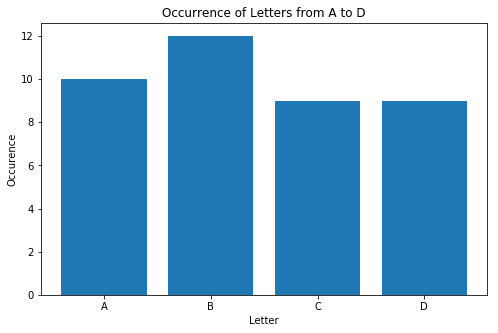

In [12]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,5))
rng = range(len(occurList))

plt.bar(rng, occurList)
plt.xlabel('Letter'); plt.ylabel('Occurence')
plt.xticks(rng, letterList)
tmpString = 'Occurrence of Letters from {} to {}'.format(letterList[0], letterList[len(letterList)-1])
plt.title(tmpString)
plt.show()

### &#9632; Probability

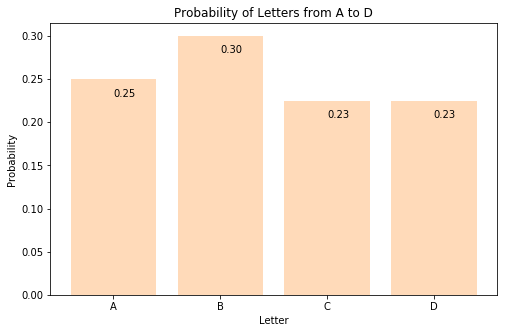

In [21]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Occurrence to probability: 
probList = np.array(occurList, dtype='float')/sum(occurList)

fig = plt.figure(figsize = (8,5))
rng = range(len(probList))

plt.bar(rng, probList, color='peachpuff')
plt.xlabel('Letter'); plt.ylabel('Probability')
plt.xticks(rng, letterList)
tmpString = 'Probability of Letters from {} to {}'.format(letterList[0], letterList[len(letterList)-1])
plt.title(tmpString)


for i in range(len(rng)):
    plt.text(i, probList[i]-.02, '{:.2f}'.format(probList[i]))

plt.show()

### &#9632; Entropy H(X)
$$ H(X) = -\sum_{x_i \in X}{p(x_i)*log_2(p(x_i))} $$

In [24]:
# you should write your own entropy function
# Hx = ... # Hx is the entropy of source X.
import math
probList = list(float(i)/sum(occurList) for i in occurList)
Hx = 0
for i in range(len(probList)):
    Hx += -probList[i]*math.log2(probList[i])
print(Hx)

1.9894910703001343


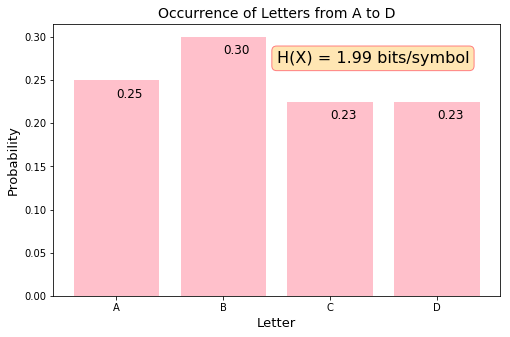

In [16]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Occurrence to probability: 
probList = list(float(i)/sum(occurList) for i in occurList)

Hx = 1.99
fig = plt.figure(figsize = (8,5))
rng = range(len(probList))
plt.bar(rng, probList, color='pink')
plt.xlabel('Letter', size=13); plt.ylabel('Probability', size=13)
if False:
    plt.text(2., 0.9*max(probList), 'H(X) = {:.2f} bits/symbol'.format(Hx), {'color': 'b', 'fontsize': 12})
else:
    plt.text(1.5, 0.9*max(probList), 'H(X) = {:.2f} bits/symbol'.format(Hx), size=16, color='k',
             bbox=dict(boxstyle="round",
                       ec=(1., 0.5, 0.5),
                       fc=(1., 0.9, 0.7),)) # fc=(1., 0.8, 0.8),)) #
for i in range(len(rng)):
    plt.text(i, probList[i]-.02, '{:.2f}'.format(probList[i]), size = 12, color='k')                   
plt.xticks(rng, letterList)
tmpString = 'Occurrence of Letters from {} to {}'.format(letterList[0], letterList[len(letterList)-1])
plt.title(tmpString, size=14)
plt.show()

### &#9632; Randomly generated Message with a given probability set
#### By the way, Python also has seed( ), but we cannot control the probability of each letter

In [27]:
import random

random.seed(123)
numbers = [random.randrange(65, 65 + 26 + 1) for i in range(10)]
numbers


[66, 73, 67, 89, 78, 73, 68, 91, 66, 77]

#### Random message with given probability set: 
__Method 1__ using `numpy.random.choice()`.<br>

Information of `numpy.random.choice()` can be found: <br> https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.random.choice.html 

In [38]:
import numpy as np

np.random.seed(123)
list(chr(np.random.choice(np.arange(65, 69), p=[0.5, 0.15, 0.15, 0.2])) for i in range(10))

['C', 'A', 'A', 'B', 'C', 'A', 'D', 'C', 'A', 'A']

#### Random message with given probability set: 
__Method 2__ using `random.choices()` <br>
Information of `random.choices()` can be found with keyword `choices()`: <br> https://www.w3schools.com/python/ref_random_choices.asp

In [33]:
from random import choices

random.seed(123)
letter = [65, 66, 67, 68, 69, 70]
probability = [0.1, 0.05, 0.05, 0.2, 0.4, 0.2]

msg1 = choices(letter, probability, k=20)

print(msg1, type(msg1))
print([chr(i) for i in msg1])

[65, 65, 69, 66, 70, 65, 69, 68, 70, 67, 68, 68, 68, 65, 69, 65, 69, 65, 68, 69] <class 'list'>
['A', 'A', 'E', 'B', 'F', 'A', 'E', 'D', 'F', 'C', 'D', 'D', 'D', 'A', 'E', 'A', 'E', 'A', 'D', 'E']
